### Notebook Description  

Welcome to **The Predictor's Forge**, a Jupyter Notebook designed to empower data enthusiasts in mastering predictive modeling using the IBM HR Analytics Employee Attrition Dataset. This notebook guides you through the essential steps of building and evaluating machine learning models to predict employee attrition. From preprocessing the data to selecting an appropriate algorithm and optimizing its performance, this notebook serves as a hands-on journey to transform raw data into actionable insights. Whether you're a data science novice or an experienced practitioner, this notebook provides a clear pathway to sharpen your predictive modeling skills and create impactful solutions for real-world business challenges.  


### Key Tasks in Stage 3  

**1. Data Preprocessing**  

**2. Model Building**   

**3. Performance Evaluation**  

**4. Model Optimization**  

#### **1. Data Preprocessing**  
- Encode categorical variables (e.g., one-hot encoding, label encoding).  
- Scale numerical features using methods like StandardScaler or MinMaxScaler.  
- Save the preprocessed dataset as `preprocessed_data.csv`.  
 

In [32]:
# import the necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import pandas as pd
import os
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df = pd.read_csv("../data/cleaned_data.csv")

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assume df is the loaded DataFrame
columns_to_encode = ['BusinessTravel', 'Department', 'EducationField', 
                     'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']

# Create a Markdown string to explain the encoding
md_explanation = "# Encoding Explanation\n\n"

# Apply encoding to each column
for column in columns_to_encode:
    if column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) == 2:  # Binary columns
            if column == 'Gender':  # Special case for Gender
                df[column] = df[column].map({'Female': 1, 'Male': 0})
                md_explanation += f"### Column: {column}\nBinary encoding applied:\n- Female: 1\n- Male: 0\n\n"
            elif column == 'Attrition':  # Special case for Attrition
                df[column] = df[column].map({'Yes': 1, 'No': 0})
                md_explanation += f"### Column: {column}\nBinary encoding applied:\n- Yes: 1\n- No: 0\n\n"
            else:
                df[column] = df[column].map({unique_values[0]: 0, unique_values[1]: 1})
                md_explanation += f"### Column: {column}\nBinary encoding applied:\n- {unique_values[0]}: 0\n- {unique_values[1]}: 1\n\n"
        else:  # Columns with more than two unique values
            label_encoder = LabelEncoder()
            df[column] = label_encoder.fit_transform(df[column])
            label_mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}
            md_explanation += f"### Column: {column}\nLabel encoding applied:\n"
            md_explanation += "\n".join([f"- {label}: {idx}" for label, idx in label_mapping.items()]) + "\n\n"
    else:
        md_explanation += f"### Column: {column}\nColumn not found in the DataFrame.\n\n"

# Save the Markdown explanation to a file
with open("encoding_explanation.md", "w") as file:
    file.write(md_explanation)

# Display the DataFrame after encoding
print("DataFrame after encoding:")
print(df.head())


DataFrame after encoding:
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   37          1               2       1373           1                 2   
1   33          0               1       1392           1                 3   
2   32          0               1       1005           1                 2   
3   29          0               2        153           1                15   
4   31          0               2        670           1                26   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               4              1               4  ...   
1          4               1              1               5  ...   
2          2               1              1               8  ...   
3          2               1              1              15  ...   
4          1               1              1              16  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         2     

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['MonthlyRate', 'MonthlyIncome', 'DailyRate', 'HourlyRate']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame after scaling
print("DataFrame after scaling numerical features:")
print(df[columns_to_scale].head())


DataFrame after scaling numerical features:
   MonthlyRate  MonthlyIncome  DailyRate  HourlyRate
0     0.012026       0.067595   0.910394    0.885714
1     0.847156       0.120877   0.924014    0.371429
2     0.392849       0.131221   0.646595    0.700000
3     0.425750       0.204411   0.035842    0.271429
4     0.525823       0.121007   0.406452    0.014286


In [34]:
# List of columns to drop from the DataFrame
columns_to_drop = [
    'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'
]

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping columns
print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   37          1               2   0.910394           1                 2   
1   33          0               1   0.924014           1                 3   
2   32          0               1   0.646595           1                 2   
3   29          0               2   0.035842           1                15   
4   31          0               2   0.406452           1                26   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               4                        4       0  ...   
1          4               1                        4       1  ...   
2          2               1                        4       0  ...   
3          2               1                        4       1  ...   
4          1               1                        1       0  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                      

#### **2. Model Building**  
- Build a machine learning model to classify employee attrition using algorithms like Logistic Regression, Decision Tree, or Random Forest.  
- Implement the model in Python and document the workflow in a Jupyter Notebook.  

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

# Split the data into features (X) and target (y)
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the models
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
random_forest_model = RandomForestClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Directory to save the models
model_dir = "../Models/"
os.makedirs(model_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save the models as .pkl files
logistic_model_path = os.path.join(model_dir, "logistic_regression_model.pkl")
random_forest_model_path = os.path.join(model_dir, "random_forest_model.pkl")

joblib.dump(logistic_model, logistic_model_path)
joblib.dump(random_forest_model, random_forest_model_path)

# Output summary
print("Models have been trained and saved successfully!")
print(f"Logistic Regression model saved to: {logistic_model_path}")
print(f"Random Forest model saved to: {random_forest_model_path}")

Models have been trained and saved successfully!
Logistic Regression model saved to: ../Models/logistic_regression_model.pkl
Random Forest model saved to: ../Models/random_forest_model.pkl


#### **3. Performance Evaluation**  
- Split the data into training (70%) and testing (30%) sets.  
- Evaluate the model using metrics such as:  
  - Accuracy  
  - Precision  
  - Recall  
  - F1-Score  
- Visualize the results with a confusion matrix.  

--- Logistic Regression ---
Accuracy: 0.8714
Precision: 0.6316
Recall: 0.3750
F1-Score: 0.4706
--- Random Forest ---
Accuracy: 0.9714
Precision: 1.0000
Recall: 0.8125
F1-Score: 0.8966

Best Model: Random Forest
F1-Score: 0.8966


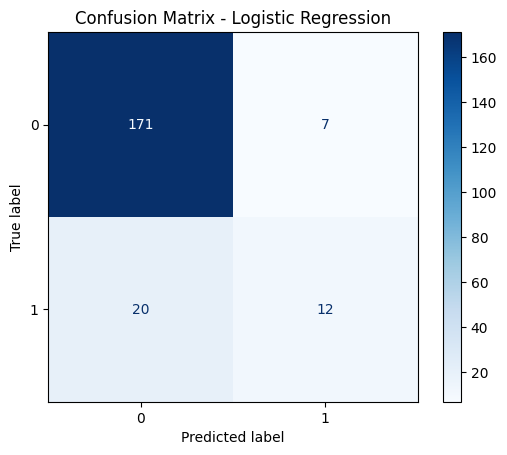

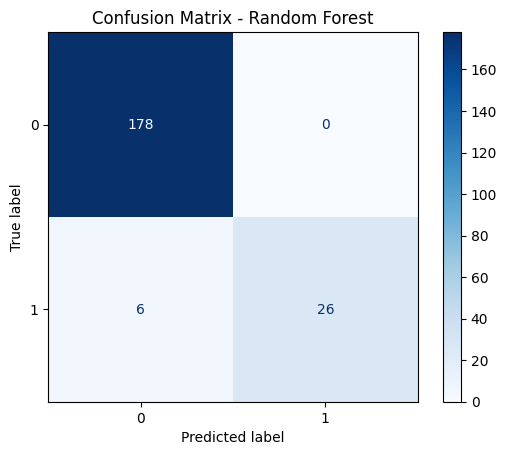

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Load the saved models
logistic_model = joblib.load('../Models/logistic_regression_model.pkl')
random_forest_model = joblib.load('../Models/random_forest_model.pkl')

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Attrition' is the target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate a model
def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f"Confusion Matrix - {model_name}")
    
    return {'model': model_name, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

# Evaluate both models
results = []
results.append(evaluate_model(logistic_model, "Logistic Regression"))
results.append(evaluate_model(random_forest_model, "Random Forest"))

# Find the best model based on F1-Score
best_model = max(results, key=lambda x: x['f1'])
print("\nBest Model:", best_model['model'])
print(f"F1-Score: {best_model['f1']:.4f}")

#### **4. Model Optimization (Bonus)**  
- Perform hyperparameter tuning using techniques like GridSearchCV.  
- Document tested parameters and present the optimized values for improved model performance.  

In [38]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import joblib

# Split the data into training and testing sets
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Hyperparameter Tuning
logistic_params = {
    'penalty': ['l1', 'l2'],  # 'elasticnet' requires saga solver, which may cause convergence issues
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],  # Limiting solvers to those compatible with penalties
    'max_iter': [500, 1000, 2000]  # Increasing max_iter to avoid convergence warnings
}

logistic_model = LogisticRegression()
logistic_grid = GridSearchCV(logistic_model, logistic_params, scoring='f1', cv=5, verbose=1)
logistic_grid.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", logistic_grid.best_params_)
logistic_best_model = logistic_grid.best_estimator_

# Save the optimized Logistic Regression model
joblib.dump(logistic_best_model, '../Models/logistic_regression_optimized.pkl')

# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, scoring='f1', cv=5, verbose=1)
rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
rf_best_model = rf_grid.best_estimator_

# Save the optimized Random Forest model
joblib.dump(rf_best_model, '../Models/random_forest_optimized.pkl')

# Evaluate both optimized models
# Logistic Regression Evaluation
y_pred_logistic = logistic_best_model.predict(X_test)
logistic_f1 = f1_score(y_test, y_pred_logistic)
print(f"Optimized Logistic Regression F1-Score: {logistic_f1:.4f}")

# Random Forest Evaluation
y_pred_rf = rf_best_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf)
print(f"Optimized Random Forest F1-Score: {rf_f1:.4f}")

# Determine the best model
if logistic_f1 > rf_f1:
    print("\nThe Optimized Logistic Regression model is the better model.")
else:
    print("\nThe Optimized Random Forest model is the better model.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Logistic Regression Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Optimized Logistic Regression F1-Score: 0.4918
Optimized Random Forest F1-Score: 0.3750

The Optimized Logistic Regression model is the better model.
